In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_swiss_roll

In [2]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2,0]] / 10
data = data *np.array([1, -1])

(-2.0, 2.0)

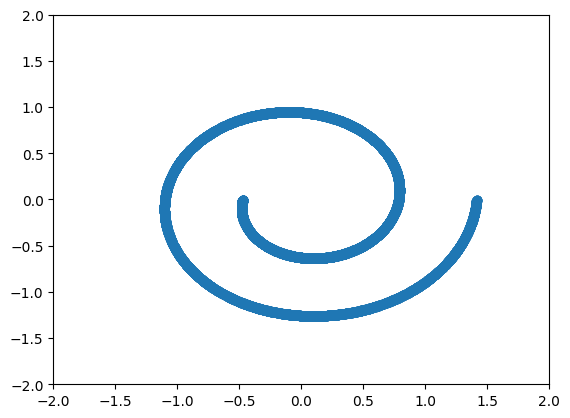

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2,2])
plt.ylim([-2,2])

In [4]:
class DiffusionModel():
    def __init__(self, T):
        self.betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5 # scaling data
        self.alphas = 1-self.betas
        self.alphas_bar = torch.cumprod(self.alphas, 0)


    def forward_process(self, x0, t):

        # param t: Number of diffusion steps
        # param x0: data

        assert t > 0, 't should be greater than 0'

        t = t - 1 # Because we start indexing at 0

        mu = torch.sqrt(self.alphas_bar[t]) * x0
        std = torch.sqrt(1 - self.alphas_bar[t])
        epsilon = torch.randn_like(x0)

        return mu + epsilon * std # data ~ N(mu, std)

In [5]:
model = DiffusionModel(40)
x0 = torch.from_numpy(data)
xT = model.forward_process(x0, 20)

In [6]:
print(xT.mean(0))
print(xT.std(0))

tensor([ 0.0177, -0.1959], dtype=torch.float64)
tensor([0.6937, 0.6733], dtype=torch.float64)


(-2.0, 2.0)

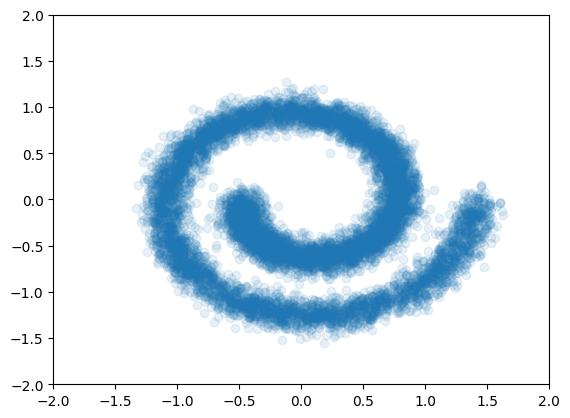

In [7]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha=0.1)
plt.xlim([-2,2])
plt.ylim([-2,2])